In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

In [101]:
def model_ols(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def show(data, y_symbol, x_symbol):
    y = data[y_symbol]
    x = data[x_symbol]
    
    model=model_ols(y, x)
    std = statistics.stdev(model.resid)
    entry_threshold = 2 # entrada em 2 desvio padrão

    #plt.figure(figsize=(15,6))
    plt.figure(figsize=(10,5))
    plt.plot(model.resid)
    plt.ylabel('Residual')
    plt.title(y_symbol + ' / ' + x_symbol)

    plt.axhline(0, color='black',label='mean',linestyle='--') # Add the mean of residual
    plt.axhline(entry_threshold*std, color='green', linestyle='--',label='trade')
    plt.axhline(-entry_threshold*std, color='green', linestyle='--')

    plt.legend()
    plt.show()

In [26]:
pairs = pd.read_csv('datasets/cointegrated_pairs.csv', index_col=0)
data = pd.read_csv('datasets/data.csv', index_col=0)
pairs.head(3)

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr
0,AALR3,ABCB4,0.023039,-3.150434,1.308303,3,0.254748,0.978935
1,AALR3,ALSO3,0.005086,-3.637314,0.424785,3,0.208671,0.984446
2,AALR3,ALUP11,0.012351,-3.361289,1.681917,3,0.199234,0.968927


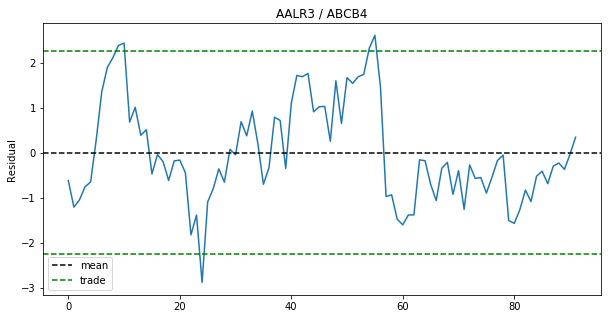

In [103]:
show(data, 'AALR3', 'ABCB4')

In [89]:
pairs.loc[(pairs['Hurst'] < 0.5)]

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr
0,AALR3,ABCB4,0.023039,-3.150434,1.308303,3,0.254748,0.978935
1,AALR3,ALSO3,0.005086,-3.637314,0.424785,3,0.208671,0.984446
2,AALR3,ALUP11,0.012351,-3.361289,1.681917,3,0.199234,0.968927
3,AALR3,ANIM3,0.038146,-2.966476,0.660030,5,0.214762,0.964894
4,AALR3,ARZZ3,0.009324,-3.451473,0.476037,3,0.172292,0.969824
...,...,...,...,...,...,...,...,...
24430,YDUQ3,VIVA3,0.006510,-3.562942,1.730796,3,0.280037,0.977444
24431,YDUQ3,WHRL4,0.036003,-2.988289,7.152123,4,0.273358,0.910374
24432,YDUQ3,WIZS3,0.013005,-3.344433,3.682103,3,0.212889,0.964256
24433,YDUQ3,WSON33,0.000691,-4.187886,1.319811,3,0.148051,0.978848


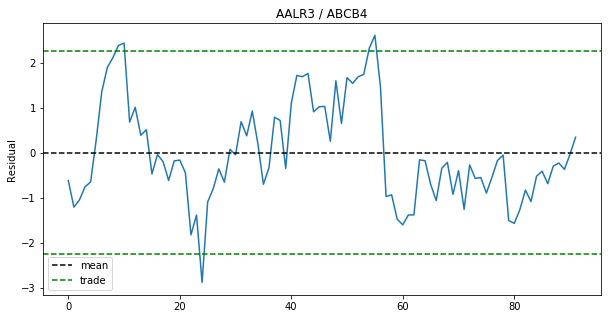

In [106]:
show(data, 'AALR3', 'ABCB4')